<a href="https://colab.research.google.com/github/vilcagamarracf/Playing-with-colab/blob/main/Snipetts_GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Snippets - GEE

In [23]:
#@markdown Banner
%%html
<marquee style='width: 30%; color: blue;'><b>¡En proceso! </b></marquee>

## 1. Librerías de Inicio

- Revisar la versión actual de [Google Earth Engine API](https://github.com/google/earthengine-api)
- Para ver la lista completa de funciones de GEE: [The Client Libraries section](https://developers.google.com/earth-engine/apidocs) (API reference for both JavaScript and Python clients)

In [2]:
#Revisar la versión actual de Google Earth Engine API
# https://github.com/google/earthengine-api
import ee

ee.Initialize()
print('GEE Version:', ee.__version__)

GEE Version: 0.1.238


In [ ]:
# Para actualizar la versión de google earth engine. 
# 29 de Octubre, 2020: GEE Version: 0.1.240
!pip install earthengine-api --upgrade 

In [ ]:
# Credenciales Google Earth Engine
# import ee
ee.Authenticate()
ee.Initialize()
print('Ya estás logeado.')
print('GEE Version:',ee.__version__)

In [3]:
#@markdown **`mapdisplay()`** 

import folium
def mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    Crea mapas interactivos usando la librería `folium`

    - `center`: Center of the map (Latitude and Longitude) (`list`)
    - `dicc`: Earth Engine Geometries or Tiles dictionary (`dict`)
    - `Tiles=`: 
    Mapbox Bright 
    Mapbox Control Room
    Stamen Terrain
    Stamen Toner
    stamenwatercolor
    cartodbpositron
    - `zoom_start=`: Initial zoom level for the map (`int`)

    Return: A folium.Map object
    '''
    center = center[::-1]
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz
print('mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10) listo!')

mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10) listo!


**Important note:** A key difference between folium and ipyleaflet is that ipyleaflet is built upon ipywidgets and allows bidirectional communication between the front-end and the backend enabling the use of the map to capture user input, while folium is meant for displaying static data only (source). Note that Google Colab currently does not support ipyleaflet (source). 


In [4]:
#@markdown **`ee_get_dates()`** 

#@markdown Permite obtener información de la Fecha y 
#@markdown Hora de toma de imágen por el satélite mediante la propiedad `'system:time_start'`
from datetime import datetime as dt
def ee_get_dates(ic):
  dates = ic.aggregate_array('system:time_start').getInfo()
  anonym = lambda x: dt.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S')
  return list(map(anonym, dates))
print('ee_get_dates(img_col) listo')

ee_get_dates(img_col) listo


## 2. Visualizaciones

### *Visualización de un archivo vectorial*

Para obtener áreas de interés (AOI o ROI) hay dos formas:
- En formato GeoJSON: 
  1. Dibujar área de estudio de forma rápida: http://geojson.io/
  2. Copiar el código y asignarle una variable
  3. Agregar un constructor ee.FeatureCollection(variable)
  
- En cualquier formato pero usando el Asset de GEE:
  1. Para más información sobre el manejo de archivos en el Asset de GEE: [Managing Assets](https://developers.google.com/earth-engine/guides/asset_manager)
  2. Copiar el ID del archivo de vuestro Asset y usar el constructor ee.FeatureCollection como se ve a continuación:

```
area_1 = ee.FeatureCollection('users/CesarVilca/area_1')     
area_2 = ee.FeatureCollection('users/CesarVilca/area_2')    # Arrojará 1 imagen Sentinel
area_3 = ee.FeatureCollection('users/CesarVilca/area_3')    # Arrojará 2 imágenes Sentinel
area_total = ee.FeatureCollection('users/CesarVilca/area_total')
```

Finalmente, aplicar `.geometry()` a los ee.FeatureCollection para volverlos una geometría trabajable.

In [8]:
#@markdown Shapefile de Chincha (Es necesario tener el ID del archivo en el Asset)
area_1 = ee.FeatureCollection('users/CesarVilca/area_1')     
area_2 = ee.FeatureCollection('users/CesarVilca/area_2')    # 1 imagen Sentinel
area_3 = ee.FeatureCollection('users/CesarVilca/area_3')    # 2 imágenes Sentinel
area_total = ee.FeatureCollection('users/CesarVilca/area_total')

roi = area_2.geometry().bounds() # Arrojará 1 imagen Sentinel
roi_clip = area_total.geometry().bounds()
centroide = [-76.0908, -13.4589] #centroid = img.geometry().centroid().getInfo()['coordinates']

dicc = {'area1':area_1.getInfo(),
       'area2':area_2.getInfo(),
       'area3':area_3.getInfo(),
       'area total':area_total.getInfo(),
       'roi':roi.getInfo()}
mapdisplay(centroide, dicc, zoom_start=11)

In [5]:
#@markdown *Visualización1 de un archivo vectorial (Chincha)*

# Es necesario tener el ID del archivo 
chincha_shp = ee.FeatureCollection('users/CesarVilca/area_total')    
chincha = chincha_shp.geometry() # Volver geometría

# Centroide del roi
center1 = chincha.centroid().coordinates().getInfo()   

# visualización del shape 
dicc_viz1 = {'chincha': chincha.bounds().getInfo()}                                                  
mapdisplay(center1,dicc_viz1,zoom_start=7)     

- Visualización con estilos (solo visualización)
> [Ejemplo](https://developers.google.com/earth-engine/apidocs/ee-featurecollection-draw)
  ```
  roi_shp = ee.FeatureCollection('users/CesarVilca/Departamentos_Peru')
  roi_draw = roi_shp.draw(color = "000000", strokeWidth = 2, pointRadius = 2) # retorna un ee.Image
  dicc_viz1 = {'Perú': roi_draw.getMapId()} 
  ```

In [9]:
#@markdown *Visualización2 de un archivo vectorial (Dptos del Perú)*

# Visualización mediante ID en Asset
roi_shp = ee.FeatureCollection('users/CesarVilca/Departamentos_Peru')
roi = roi_shp.geometry()
roi_dict = roi_shp.getInfo()

# Centrado de la visualización
center1 = roi.centroid().coordinates().getInfo()   

# visualización del shape 
# https://htmlcolors.com/ para modificar el color
roi_draw = roi_shp.draw(color = "000000", strokeWidth = 2, pointRadius = 2) 
dicc_viz1 = {'Perú': roi_draw.getMapId()}                                                 
mapdisplay(center1, dicc_viz1, zoom_start=5) 

In [ ]:
#@markdown *Propiedades con geopandas (Dptos del Perú)*
#len(roi_dict['features']) # 25
#dptos_names = [(i,roi_dict.getInfo()['features'][i]['properties']['NOMBDEP']) for i in range(25)]
#pprint(dptos_names)

# Visualización con geopandas
#!pip install geopandas
import geopandas as gpd
roi_gpd  = gpd.GeoDataFrame.from_features(roi_dict)
roi_gpd.head(11)
#roi_gpd.plot()

### *Paletas para Visualización*

Para mas paletas de visualizacion, visitar el catálogo de datos de Earth Engine.

In [16]:
#@markdown *Paletas*

# Paleta Inferno 
inferno_pal = ["#000004", "#560F6D", "#BB3654", "#F98C09", "#FCFFA4"]

# Paleta NDVI (Yuri SIG)
ndvi_pal = ['ffffff','fffcff','fff9ff','fff7ff','fff4ff','fff2ff','ffefff',
            'ffecff','ffeaff','ffe7ff','ffe5ff','ffe2ff','ffe0ff','ffddff',
            'ffdaff','ffd8ff','ffd5ff','ffd3ff','ffd0ff','ffceff','ffcbff',
            'ffc8ff','ffc6ff','ffc3ff','ffc1ff','ffbeff','ffbcff','ffb9ff',
            'ffb6ff','ffb4ff','ffb1ff','ffafff','ffacff','ffaaff','ffa7ff',
            'ffa4ff','ffa2ff','ff9fff','ff9dff','ff9aff','ff97ff','ff95ff',
            'ff92ff','ff90ff','ff8dff','ff8bff','ff88ff','ff85ff','ff83ff',
            'ff80ff','ff7eff','ff7bff','ff79ff','ff76ff','ff73ff','ff71ff',
            'ff6eff','ff6cff','ff69ff','ff67ff','ff64ff','ff61ff','ff5fff',
            'ff5cff','ff5aff','ff57ff','ff55ff','ff52ff','ff4fff','ff4dff',
            'ff4aff','ff48ff','ff45ff','ff42ff','ff40ff','ff3dff','ff3bff',
            'ff38ff','ff36ff','ff33ff','ff30ff','ff2eff','ff2bff','ff29ff',
            'ff26ff','ff24ff','ff21ff','ff1eff','ff1cff','ff19ff','ff17ff',
            'ff14ff','ff12ff','ff0fff','ff0cff','ff0aff','ff07ff','ff05ff',
            'ff02ff','ff00ff','ff00ff','ff0af4','ff15e9','ff1fdf','ff2ad4',
            'ff35c9','ff3fbf','ff4ab4','ff55aa','ff5f9f','ff6a94','ff748a',
            'ff7f7f','ff8a74','ff946a','ff9f5f','ffaa55','ffb44a','ffbf3f',
            'ffc935','ffd42a','ffdf1f','ffe915','fff40a','ffff00','ffff00',
            'fffb00','fff700','fff300','fff000','ffec00','ffe800','ffe400',
            'ffe100','ffdd00','ffd900','ffd500','ffd200','ffce00','ffca00',
            'ffc600','ffc300','ffbf00','ffbb00','ffb700','ffb400','ffb000',
            'ffac00','ffa800','ffa500','ffa500','f7a400','f0a300','e8a200',
            'e1a200','d9a100','d2a000','ca9f00','c39f00','bb9e00','b49d00',
            'ac9c00','a59c00','9d9b00','969a00','8e9900','879900','7f9800',
            '789700','709700','699600','619500','5a9400','529400','4b9300',
            '439200','349100','2d9000','258f00','1e8e00','168e00','0f8d00',
            '078c00','008c00','008c00','008700','008300','007f00','007a00',
            '007600','007200','006e00','006900','006500','006100','005c00',
            '005800','005400','005000','004c00']

# paleta ALOS
# https://developers.google.com/earth-engine/datasets/catalog/JAXA_ALOS_AW3D30_V2_2
palette = ['0000ff', '00ffff', 'ffff00', 'ff0000', 'ffffff']

### *Visualización de archivos raster (DEM - SRTM vs ALOS)*

Comparación de datasets:

- [NASA SRTM Digital Elevation 30m](https://developers.google.com/earth-engine/datasets/catalog/USGS_SRTMGL1_003)
- [ALOS DSM: Global 30m](https://developers.google.com/earth-engine/datasets/catalog/JAXA_ALOS_AW3D30_V2_2)

In [21]:
#@markdown Comparación entre dems: SRTM y ALOS

srtm = ee.Image("USGS/SRTMGL1_003")
alos = ee.Image("JAXA/ALOS/AW3D30/V2_2")

inferno_pal = ["#000004", "#560F6D", "#BB3654", "#F98C09", "#FCFFA4"]

srtm_id_01 = srtm.getMapId()
srtm_id_02 = srtm.getMapId({'palette':inferno_pal, 'min':0, 'max':5500})    
alos_id_01 = alos.getMapId({'bands':'AVE_DSM', 'palette':inferno_pal, 'min':0, 'max':5500})

center = [-70.61,-13.35]

dicc_viz = {'simple_srtm' : srtm_id_01,
            'complex_srtm': srtm_id_02,
            'complex_alos': alos_id_01
            }
mapdisplay(center, dicc_viz,zoom_start=10)

In [18]:
# Función slope de ee.Terrain.slope()

srtm = ee.Image("USGS/SRTMGL1_003")
elevation = srtm.select('elevation')
slope = ee.Terrain.slope(elevation)

center = [0,0]
dicc_viz = {'srtm': slope.getMapId()}

mapdisplay(center, dicc_viz,zoom_start=3)

### *Diagrama de dispersión de un ee.Image (Landsat 8)*

> Para una mejor visualización usamos la librería **`pprint`** : Nos devolverá los resultados vectoriales en geoJSON:
- Properties
- Geometry
- Features

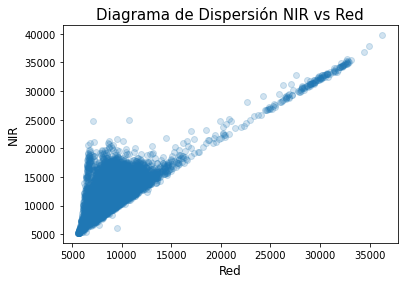

In [ ]:
#@markdown *Imagen Landsat 8*
img2 = ee.Image('LANDSAT/LC08/C01/T1_RT/LC08_006069_20190712')    # Imagen Landsat 8 
centroid = img2.geometry().centroid().getInfo()['coordinates']    # centroide
mydicc = {'landsat8': img2.getMapId({'bands':['B5','B4','B3']})}  # paleta de visualización 
#mapdisplay(centroid, mydicc, Tiles='OpensTreetMap', zoom_start=9) # visualización

# Puntos de sampleo para visualización: 3 
samp = img2.select(['B4','B5']).sample(scale = 30, numPixels = 3)
#print(samp.getInfo()) # Visualización de la metadata (se ve mejor usando pprint: 'pretty print')


from pprint import pprint
# Seleccionar bandas RED y NIR, escalar y muestrear los puntos
# Scale = 30 (tamaño del pixel), numPixels = Número de puntos aleatorios (sample)
#samp = img2.select(['B4','B5']).sample(scale = 30, numPixels = 3)  
#pprint(samp.getInfo()) 


# Seleccionar bandas RED y NIR, escalar y muestrear los puntos
# Scale = 30 (tamaño del pixel), numPixels = Número de puntos aleatorios (sample)
samp = img2.select(['B4','B5']).sample(scale = 30, numPixels = 10000)  

# Organizar la muestra como una lista anidada (lista dentro de una lista)
samp_dict = samp.reduceColumns(ee.Reducer.toList().repeat(2), ['B4','B5'])
samp_list = ee.List(samp_dict.get('list'))

# Guardar ee.List del lado del servidor como una lista de Python del lado del cliente
samp_data = samp_list.getInfo()

# Visualice un diagrama de dispersión RED vs NIR usando matplotlib
import matplotlib.pyplot as plt
plt.scatter(samp_data[0], samp_data[1], alpha= 0.2)
plt.title('Diagrama de Dispersión NIR vs Red', size=15)
plt.xlabel('Red', fontsize = 12)
plt.ylabel('NIR', fontsize = 12)
plt.show()

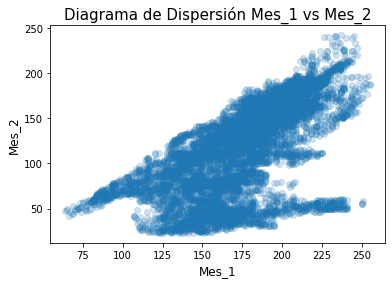

In [ ]:
# Visualización de OpenLandMap Precipitation monthly
# https://developers.google.com/earth-engine/datasets/catalog/OpenLandMap_CLM_CLM_PRECIPITATION_SM2RAIN_M_v01

# Datos Vectoriales: Amazonas
amazonas = ee.FeatureCollection('users/csaybardemo/amazonas') # ID en Asset
roi = amazonas.geometry().bounds()

rainmap = ee.Image("OpenLandMap/CLM/CLM_PRECIPITATION_SM2RAIN_M/v01").clip(roi)
#print(rainmap.bandNames().getInfo())   # Nombre de las bandas: Meses del año
rainmap_jan = rainmap.select('jan')

# Visualización
#palette_rain = ["#450155", "#3B528C", "#21918D", "#5DCA63","#FFE925"] # Palette de C. Aybar
palette_rain= ['ecffbd', 'ffff00', '3af6ff', '467aff', '313eff', '0008ff'] # Palette de dataset
center = [-78.053, -5.068]
amazonas_img = amazonas.draw(color = "000000", strokeWidth = 3, pointRadius = 3)
dict = {'January': rainmap_jan.getMapId({'min':0,'max':380,'palette':palette_rain}),'amazonas':amazonas_img.getMapId()}

#mapdisplay(center, dict, zoom_start=8)

#@markdown *Diagrama de disepersión Mes_1 vs Mes_2*

# Selección de bandas
Mes_1 = 'feb' #@param ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
Mes_2 = 'aug' #@param ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bands = [Mes_1,Mes_2]
# Puntos de sampleo para visualización: 3 
samp = rainmap.select(bands).sample(scale = 1000, numPixels = 10000)
#pprint(samp.getInfo()) # Visualización de la metadata (se ve mejor usando pprint: 'pretty print')

# Organizar la muestra como una lista anidada (lista dentro de una lista)
samp_dict = samp.reduceColumns(ee.Reducer.toList().repeat(2), bands)
samp_list = ee.List(samp_dict.get('list'))

# Guardar ee.List del lado del servidor como una lista de Python del lado del cliente
samp_data = samp_list.getInfo()

# Visualice un diagrama de dispersión RED vs NIR usando matplotlib
import matplotlib.pyplot as plt
plt.scatter(samp_data[0], samp_data[1], alpha= 0.2)
plt.title('Diagrama de Dispersión Mes_1 vs Mes_2', size=15)
plt.xlabel('Mes_1', fontsize = 12)
plt.ylabel('Mes_2', fontsize = 12)
plt.show()

## 3. Descargas

### 03.1 *Descarga de Imágenes en GEE API Python*

In [ ]:
#@markdown *Monitoreo de tareas (tiempo)*
import time 
def ee_monitoring(ee_task):
  while ee_task.active():
    print('Sondeo de la tarea (id: {}).', format(ee_task.id))
    time.sleep(5)
#ee_monitoring(task)

## 4. Procesos Automatizados

### 04.1 *Función para enmascarar nubes Sentinel-2*

In [ ]:
#@markdown *Función para enmascarar nubes*
# Operadores de bit a bit
# Operador bit a bit desplazamiento a la izquierda <<
# Little indian (los bits se cuentan de izq a derecha) y Big indian (los bits se cuentan de derecha a izq)
def maskS2clouds(image):
  qa = image.select('QA60')
  opaque_cloud = 1 << 10
  cirrus_cloud = 1 << 11
  mask = qa.bitwiseAnd(opaque_cloud).eq(0)\
           .And(qa.bitwiseAnd(cirrus_cloud).eq(0))
  clean_image = image.updateMask(mask)
  return clean_image

### 04.2 Índices Espectrales en Imágenes (LANDSAT 8)



> Mapping sobre una ImageCollection
Snippet: `ee.ImageCollection("LANDSAT/LC08/C01/T1_SR"))`

Para aplicar una funcion a cada imagen en una ImageCollection, use **`imageCollection.map()`**. El unico argumento para **`map()`** es una funcion que toma un parametro: un **`ee.Image`**. Por ejemplo, el siguiente codigo agrega una banda de marca de tiempo a cada imagen de la coleccion.

<center>
<img src = 'https://user-images.githubusercontent.com/16768318/72934781-27aa9e00-3d5c-11ea-99f9-15117ab864bb.png' width  =300px>
</center>

> Operadores Google Earth Engine

 _ | _ | GEE
--------------|-------------|-------------
Arithmetic	|+ - * / % **	|add, subtract, multiply, divide, mod, exp
Comparison	| == != < > <= >= |	eq, neq, lt, gt, lte,gte.
Logical |	&& \|\| ! ^	| And, Or, Not, Xor

In [ ]:
#@title Función NDVI (Landsat 8)

def ndvi_l8(image):
  return image.normalizedDifference(['B5','B4']).rename('NDVI')

In [ ]:
#@title Función EVI (Landsat 8)

def evi_l8(image):
  nir  = image.select(['B5'])
  red  = image.select(['B4'])
  blue = image.select(['B2'])
  return nir.subtract(red).divide(nir.add(red.multiply(6)).subtract(blue.multiply(7.5)).add(1)).multiply(2.5).rename('EVI')

## 5. *Aplicaciones de GEE*

### *Prueba Landsat 8*

In [ ]:
# FILTRADO POR METADATOS: Carga imagenes Landsat 8 TOA
# Colección de imágenes Landsat 8
# Filtrado por PATH
# Filtrado por ROW
# Filtrado por % de Nubes
# Función a aplicar
# Mapa a obtener: mediana
l8 = ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")\
        .filter(ee.Filter.eq('WRS_PATH', 6))\
        .filter(ee.Filter.eq('WRS_ROW', 69))\
        .filter(ee.Filter.lt('CLOUD_COVER',5))\
        .map(evi_l8)\
        .median()   

# PALETA DE VISUALIZACIÓN
ndvi_palette = ["#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00","#429001", "#006400", "#003B00", "#000000"]
dicc = {'MEDIAN_NDVI': l8.getMapId({'min':-0.1,'max':1,'palette':ndvi_palette})}

# ploteamos los resultados!
center = [-75.10136671162445, -13.008109861740333]
mapdisplay(center, dicc, zoom_start= 13)

#### Normalized Difference Vegetation Index (NDVI)

<center>
<img src = 'https://www.publish.csiro.au/temp/WF16131_T1.gif' width = 500px>
<center>

In [ ]:
# Imagen Landsat 8 con el ID del mismo
img1 = ee.Image('LANDSAT/LC08/C01/T1_RT/LC08_006069_20190712')   
centro_img1 = img1.geometry().centroid().coordinates().getInfo() 

# Método 1 NDVI
# Selección de las Bandas 
nir = img1.select(['B5'])
red = img1.select(['B4'])
ndvi1 = nir.subtract(red).divide(nir.add(red))

# Método 2 NDVI
ndvi2 = img1.normalizedDifference(['B5','B4'])

# Paleta de visualización
ndvi_palette = ["#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00","#429001", "#006400", "#003B00", "#000000"]
ndvi_viz = {'ndvi_SF':ndvi1.getMapId({'palette':ndvi_palette, 'min':0,'max':0.8}),
            'ndvi_simple':ndvi1.getMapId({'min':0,'max':0.8}),
            'ndvi_02':ndvi2.getMapId({'palette':ndvi_palette,'min':0,'max':0.8})} 
# Cuando no agregas una paleta de colores, por defecto -> Visualización monocromática

# Visualización
mapdisplay(centro_img1,ndvi_viz)

#### Enhanced Vegetation Index (EVI)

<center>
<img src = 'https://www.publish.csiro.au/temp/WF16131_T1.gif' width = 500px>
<center>


In [ ]:
# Imagen Landsat 8 con el ID del mismo
img1 = ee.Image('LANDSAT/LC08/C01/T1_RT/LC08_006069_20190712')   
centro_img1 = img1.geometry().centroid().coordinates().getInfo()  

# EVI 
nir = img1.select(['B5'])
red = img1.select(['B4'])
blue = img1.select(['B2'])
evi1 = nir.subtract(red).multiply(2.5).divide(nir.add(red.multiply(6)).subtract(blue.multiply(7.5)).add(1))

evi2 = nir.subtract(red).divide(nir.add(red.multiply(6)).subtract(blue.multiply(7.5)).add(1)).multiply(2.5)

# VISUALIZATION
evi_palette = ["#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00","#429001", "#006400", "#003B00", "#000000"]
evi_viz = {'ndvi_SF1':evi1.getMapId({'palette':evi_palette, 'min':0,'max':1}),
           'ndvi_SF2':evi2.getMapId({'palette':evi_palette, 'min':0,'max':1})} 
           
mapdisplay(centro_img1,evi_viz)

#### Normalized Difference Water Index (NDWI)

In [ ]:
# Imagen Landsat 8 con el ID del mismo
img1 = ee.Image('LANDSAT/LC08/C01/T1_RT/LC08_006069_20190712')   
centro_img1 = img1.geometry().centroid().coordinates().getInfo() 

# NDWI
ndwi = img1.normalizedDifference(['B5','B6'])

# Paleta de visualización
ndwi_palette = ["#000180", "#0075FD", "#6CFB93", "#F99D05", "#A70700"]
ndwi_viz = {'ndwi_SF':ndwi.getMapId({'palette':ndwi_palette, 'min':0,'max':1})}

# Visualización
mapdisplay(centro_img1,ndwi_viz)

### *Prueba Índice Espectral EVI: Sentinel 2*

In [ ]:
#@markdown ROI: chincha_1 (GEOJSON FILE)
chincha = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -76.18949890136717,
              -13.318135029644719
            ],
            [
              -76.21833801269531,
              -13.38026767603707
            ],
            [
              -76.20597839355469,
              -13.439045104716296
            ],
            [
              -76.21009826660156,
              -13.47377045456579
            ],
            [
              -76.14486694335938,
              -13.48044782881521
            ],
            [
              -76.10710144042969,
              -13.47510594433495
            ],
            [
              -76.07208251953125,
              -13.479780099783259
            ],
            [
              -76.03294372558594,
              -13.460415146782308
            ],
            [
              -76.09336853027344,
              -13.375591582002007
            ],
            [
              -76.13731384277344,
              -13.332834518238672
            ],
            [
              -76.18949890136717,
              -13.318135029644719
            ]
          ]
        ]
      }
    }
  ]
}

# de GeoJSON a ee.Feature
ee_chincha = ee.Feature(chincha['features'][0])
roi = ee.FeatureCollection(ee_chincha)

# Obtenemos el centroide
centroide = ee_chincha.geometry().centroid().getInfo()['coordinates']
print('Centroid coords:',centroide)
#Vizualizamos el geo
#dicc = {'Region of interest (ROI)':ee_chincha.getInfo()}
#mapdisplay(centroide, dicc, zoom_start= 12)

In [ ]:
#@markdown Función EVI (Sentinel 2)

def evi_s2(image):
  nir  = image.select(['B8'])
  red  = image.select(['B4'])
  blue = image.select(['B2'])
  return nir.subtract(red).divide(nir.add(red.multiply(6)).subtract(blue.multiply(7.5)).add(1)).multiply(2.5).rename('EVI')

In [ ]:
#@title Función: ` ee_get_dates()`
#@markdown Permite obtener información de la Fecha y Hora de toma de imágen por el satélite. 

from datetime import datetime as dt
def ee_get_dates(ic):
  dates = ic.aggregate_array('system:time_start').getInfo()
  anonym = lambda x: dt.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S')
  return list(map(anonym, dates))
print('ee_get_dates() listo')

ee_get_dates() listo


In [ ]:
#@markdown 1. Identificar el producto y fecha de interés disponible:

#@markdown Satellite Product: Surface Reflectance | Data Availability
#@markdown --- | ---
#@markdown Landsat 7 | 1999-01-01 – Present 
#@markdown Landsat 8 | 2013-04-01 – Present 
#@markdown Sentinel-2| 2017-03-28 – Present  

#@markdown 2. Selección del producto Sentinel
#@markdown - Sentinel-2 MSI: MultiSpectral Instrument, Level-1C:     `ee.ImageCollection("COPERNICUS/S2")`
#@markdown - Sentinel-2 MSI: MultiSpectral Instrument, Level-2A:     `ee.ImageCollection("COPERNICUS/S2_SR")`

#@title String fields

Product_name = 'COPERNICUS/S2_SR' #@param ["COPERNICUS/S2", "COPERNICUS/S2_SR"]

#@markdown 2. Seleccionamos las fechas de interés:
Start_date = '2018-08-02'  #@param {type: "date"}
End_date  = '2020-08-04'  #@param {type: "date"}
#  Parametros globales
range_date = [Start_date, End_date]

# Llamar al ee.ImageCollection del producto Sentinel-2
# Filtro temporal (Fechas)
# Filtro espacial (La geometría: roi)
sen2_nqc = ee.ImageCollection(Product_name)\
         .filterDate(range_date[0], range_date[1])\
         .filterBounds(roi)\
         .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',0.5))\
         .map(evi_s2)
         
# Cantidad de Imágenes
print('Total de imágenes:', sen2_nqc.size().getInfo())

# PALETA DE VISUALIZACIÓN
ndvi_palette = ["#051852", "#FFFFFF", "#C7B59B", "#A8B255", "#A3C020", "#76AD00","#429001", "#006400", "#003B00", "#000000"]
evi_palette  = ['ffffff', 'fcd163', '99b718', '66a000', '3e8601', '207401', '056201', '004c00', '011301']
dicc = {'MEDIAN_EVI_1': sen2_nqc.getMapId({'min':0,'max':1,'palette':ndvi_palette}),
        'MEDIAN_EVI_2': sen2_nqc.getMapId({'min':0,'max':1,'palette':evi_palette})}

# ploteamos los resultados!
mapdisplay(centroide, dicc, zoom_start= 13)


Total de imágenes: 3


In [ ]:
sen2_nqc1 = ee.ImageCollection(Product_name)\
         .filterDate(range_date[0], range_date[1])\
         .filterBounds(roi)
         
print('Total de imágenes:', sen2_nqc1.size().getInfo())

sen2_nqc1_clip = sen2_nqc1.select(['B4','B3','B2']).mean().divide(10000)

mydicc = {'sennqc': sen2_nqc1_clip.getMapId({'min':0,'max':0.5,'bands':['B4','B3','B2']}),
          'Region of interest (ROI)':ee_chincha.getInfo()}

mapdisplay(centroide, mydicc,zoom_start=12)



Total de imágenes: 118


In [ ]:
ee_get_dates(sen2_nqc)

[]